# What Statistic Contributes most towards an NBA Player's Salary?

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included, but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Names

- Ryan Ding
- Alfernie Fabricante
- Grace Pei
- Brendan Kuang
- Clarence Chow

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

Which statistic most heavily influences an NBA player's salary at each given position? More specifically, is there some relationship between any single or combination of statistics and the amount in which an NBA player is paid?

## Background and Prior Work

The relationship between NBA players' salaries and their performance metrics has been a subject of interest among sports analysts, economists, and fans alike. Prior research has suggested that various factors, including player statistics, team success, market size, and even personal branding, can influence how much a player earns. However, the quantifiable performance metrics on the court often serve as a starting point for evaluating a player's worth.

For instance, a study by Berri et al. (2007) found that traditional statistics such as points per game have a significant impact on NBA players' salaries, although these metrics may not always correlate with a player's contribution to team success<sup><a href="#Berri2007">1</a></sup>. Another study by Groothuis and Hill (2004) suggested that while performance metrics are crucial, factors like player position and the role within the team also significantly affect salaries<sup><a href="#Groothuis2004">2</a></sup>.

Moreover, recent analyses have incorporated advanced metrics such as Player Efficiency Rating (PER) and Win Shares (WS) to assess a player's value more comprehensively. These advanced statistics aim to capture a player's overall impact on the game beyond traditional counting stats like points, rebounds, and assists. For example, Kahn (2006) highlighted the importance of these advanced metrics in determining players' salaries and pointed out that players contributing more to wins tend to earn higher salaries<sup><a href="#Kahn2006">3</a></sup>.

<a name="Berri2007">1</a>: Berri, D. J., Brook, S. L., & Fenn, A. J. (2007). The wages of wins: Taking measure of the many myths in modern sport. Stanford University Press. Link

<a name="Groothuis2004">2</a>: Groothuis, P. A., & Hill, J. R. (2004). The National Basketball Association. In The Sports Business in The Pacific Rim (pp. 133-144). Springer. Link

<a name="Kahn2006">3</a>: Kahn, L. M. (2006). The economics of the National Basketball Association. Sports Business Management: Decision Making Around the Globe. Link

# Hypothesis


Given this background, our hypothesis posits that specific statistics heavily influence NBA players' salaries at each position. We propose that assists per game could be a critical factor for point guards, given their role in orchestrating the offense. For shooting guards, the 3-point shooting efficiency might be more valued due to the emphasis on scoring from beyond the arc in modern basketball. Small forwards, being versatile players, could see their salaries most influenced by their overall scoring ability, measured by points per game. For power forwards, field-goal percentage might be paramount due to their role in scoring from inside and mid-range. Lastly, for centers, defensive metrics such as blocks per game and rebounds per game could be vital, reflecting their role in protecting the rim and controlling the boards.

# Data

## Data overview
- Dataset Name: NBA Player Salaries 2022-23
- Link to the dataset: https://app.gigasheet.com/spreadsheet/nba-player-salaries-2022-23-season/44656fd5_6281_40aa_a81f_73275250d994
- Number of observations: 433
- Number of variables: 49

This dataset lists the statistics of every player in the 2022-23 NBA season, including their salary and positions. The datatypes of this dataset consist of strings for names and positions, and numbers for everything else. To clean this dataset, we will be removing the columns that are not under investigation for this project, such as personal player info and statistics that are based off the NBA's personal data manipulation.

In [7]:
# Prerequisite libraries needed for our investigation
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

## NBA Player Salaries 2022-23

Seeing that our data has a large amount of features, we first want to remove some of them for a variety of reasons.<br>

One reason we are omitting specific attributes is because they can be better described through the use of some kept attribute. For instance, FG (Field Goals) and FGA (Field Goals Attempted) directly constitute the FG% (Field Goal Percentage) attribute, so it would make sense for us to drop both columns in favor of the latter percentage attribute that encapsulates two dimensions of information into one. Thus, this thought process is applied to columns that contain values that are represented in more compact forms, and many columns from the data are removed.<br>

Another reason to omit attributes is because they are already a result of data manipulation. The NBA, being a company that provides analytics for the sport that surrounds their company, has created their own measures of a player over the year, including but not limited to PER (Player Efficiency Rating), VORP (Value Over Replacement Player), and WS48 (Win Shares Per 48 Minutes; for context, regulation NBA games last 48 minutes).<br>

After dropping all the columns, we get a DataFrame with the following attributes:

- GP (Games Played)
- GS (Games Started)
- MP (Minutes Played)
- FG% (Field Goal Percentage)
- 3P% (3-Point Percentage)
- FT% (Free Throw Percentage)
- TRB (Total Rebounds per Game)
- AST (Assists per Game)
- STL (Steals per Game)
- BLK (Blocks per Game)
- TOV (Turnover per Game)
- PTS (Points per Game)

In [5]:
# Read in the csv file to a DataFrame and drop unneeded columns
df = pd.read_csv('datasets/NBA_Player_Salaries_2022-23.csv').drop(['Unnamed: 0','Age','Team','FG','FGA','3P','3PA','2P','2PA','2P%','eFG%','FT', 'FTA', 
                                                                   'ORB', 'DRB', 'PF','Total Minutes','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%',
                                                                   'STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP'], axis=1)

# Overview of our DataFrame's shape and composition
print('Number of attributes', df.shape[1])
print("Number of observations:", df.shape[0])
print('Number of Players by Position\n', df['Position'].value_counts(), '\n', sep='')

# Let's check out any null values and see how they should be handled...
print('Observations with Null Values')
display(df[df.isnull().any(axis=1)])

Number of attributes 15
Number of observations: 467
Number of Players by Position
Position
SG       115
SF        91
C         91
PF        86
PG        77
PG-SG      2
SF-SG      2
SG-PG      2
SF-PF      1
Name: count, dtype: int64

Observations with Null Values


,Player Name,Salary,Position,GP,GS,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PTS
75,Mitchell Robinson,17045454,C,59,58,27.0,0.671,NaN,0.484,9.4,0.9,0.9,1.8,0.7,7.4
133,Mason Plumlee,9080417,C,79,60,26.0,0.680,NaN,0.636,8.9,3.1,0.6,0.6,1.5,10.8
221,Dylan Windler,4037277,SF,3,0,3.3,0.667,0.500,NaN,0.0,0.3,0.3,0.0,0.3,1.7
233,Mark Williams,3722040,C,43,17,19.3,0.637,NaN,0.691,7.1,0.4,0.7,1.0,0.9,9.0
247,Sterling Brown,3122602,SF,4,0,6.0,0.000,0.000,NaN,2.0,0.5,0.8,0.0,0.0,0.0
254,Joe Wieskamp,2909261,SF,9,0,5.6,0.214,0.250,NaN,0.4,0.3,0.0,0.0,0.1,1.0
264,Bismack Biyombo,2905851,C,61,14,14.3,0.578,NaN,0.357,4.3,0.9,0.3,1.4,0.8,4.3
301,Udoka Azubuike,2174880,C,36,4,10.0,0.819,NaN,0.350,3.3,0.3,0.2,0.4,0.5,3.5
332,Daniel Gafford,1930681,C,78,47,20.6,0.732,NaN,0.679,5.6,1.1,0.4,1.3,1.1,9.0
344,Ryan Arcidiacono,1836090,PG,20,4,8.6,0.243,0.348,NaN,0.8,1.2,0.3,0.0,0.4,1.3


As can be seen, there are lots of NaN values to be seen in columns of various statistics for a number of players. A brief glance tells us that a lot of these players did not play much for an NBA team or do not specialize in a certain type of shot like a three-pointer. Instead of dropping these columns, we are going to keep our data and leave out these observations when analyzing our data based on these statistics.

# Exploratory Data Analysis

## Analysis of All Players in the NBA

First, we want to plot the distribution of player salaries across all positions for the season we are investigating, just to get a rough outline of the central tendency of the data and how player salaries are distributed, from role players to superstars.<br>

Note that in our graph below, each bar represents the number of players who have a salary within a $500,000 interval (for example: the first bar represents players who earn between $0-$500,000 per year, the second bar represents players who earn $500,001-$1,000,000 per year, and so forth).

Text(0.5, 1.0, 'Distribution of Player Salaries')

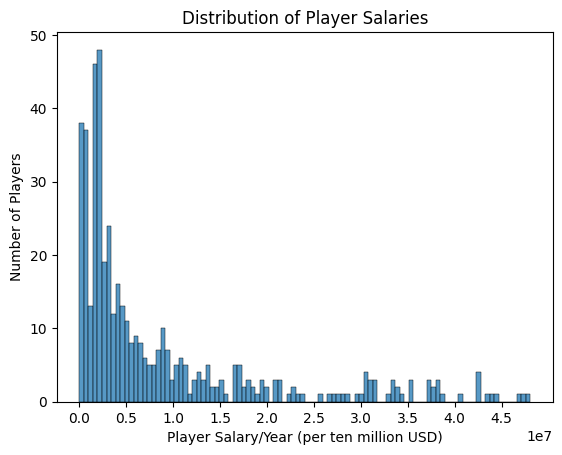

In [3]:
# Plot distribution of player salaries using a histogram with 20 bins
sns.histplot(data=df, x='Salary', bins=100)

# Label x-axis with ticks from range $0-50,000,000 in increments of $5,000,000
plt.xticks(range(0,50000000,5000000))
plt.xlabel('Player Salary/Year (per ten million USD)')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Salaries')

As can be seen, we have a lot of players who earn in the range of $5 million per year, with the distribution skewing towards the right as it gets to above average players (who are paid more for their impact on their team), and then all the way to superstars at the very end (who are paid hefty amounts for sometimes historical contributions that they make towards their team and franchise).<br>

However, we are nowhere near close to the end of our investigation!<br>

Before continuing further with our investigation, we should one thing to our data: scale it. Since there is a lot of variety within our data, with different statistics having different minimum and maximum values, it would be best to scale all our data such that the minimum of each statistic is 0 and the maximum is 1, to extract the most clear relationship.

Here is what our data looks like before we scale it:

In [6]:
df.describe()

,Salary,GP,GS,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PTS
count,4.670000e+02,467.000000,467.000000,467.000000,466.000000,454.000000,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,8.416599e+06,48.233405,22.650964,19.871306,0.465009,0.325090,0.753489,3.528051,2.107709,0.610493,0.379015,1.114133,9.129979
std,1.070812e+07,24.807740,27.094577,9.548684,0.109547,0.131624,0.148659,2.277160,1.957517,0.399083,0.364387,0.830051,6.906006
min,5.849000e+03,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.782621e+06,31.000000,1.000000,12.500000,0.417000,0.288000,0.691000,1.900000,0.800000,0.300000,0.100000,0.500000,4.100000
50%,3.722040e+06,55.000000,8.000000,19.200000,0.455000,0.344500,0.769000,3.000000,1.400000,0.600000,0.300000,0.900000,7.100000
75%,1.063354e+07,68.500000,45.500000,28.300000,0.507500,0.387000,0.844000,4.500000,2.900000,0.800000,0.500000,1.500000,11.700000
max,4.807001e+07,83.000000,83.000000,41.000000,1.000000,1.000000,1.000000,12.500000,10.700000,3.000000,2.500000,4.100000,33.100000


To get the most clear picture of which feature influences which, we wish to use the `MinMaxScaler` package in `sklearn` to reformat the data in the way mentioned above.

In [8]:
# Create a scaler object
scaler = MinMaxScaler()

# Temporarily store our columns of string data into a separate DataFrame, so we can run MinMaxScaler on our numeric data without error!
string_df = pd.DataFrame(df[['Player Name',  'Position']])
df = pd.DataFrame(scaler.fit_transform(df.drop(['Player Name', 'Position'], axis=1)), columns=df.drop(['Player Name', 'Position'],axis=1).columns)

# Put our string data and newly scaled numerical data back together into the DataFrame!
df = pd.concat([string_df, df], axis=1)

Now if we look at our data again, we can see that all the numeric data has a minimum value of 0 and a maximum value of 1, which will help us a great deal when finding out correlation in the next steps:

In [9]:
df.describe()

,Salary,GP,GS,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PTS
count,467.000000,467.000000,467.000000,467.000000,466.000000,454.000000,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,0.174990,0.576017,0.272903,0.461003,0.465009,0.325090,0.753489,0.282244,0.196982,0.203498,0.151606,0.271740,0.275830
std,0.222788,0.302533,0.326441,0.243589,0.109547,0.131624,0.148659,0.182173,0.182945,0.133028,0.145755,0.202451,0.208641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036967,0.365854,0.012048,0.272959,0.417000,0.288000,0.691000,0.152000,0.074766,0.100000,0.040000,0.121951,0.123867
50%,0.077317,0.658537,0.096386,0.443878,0.455000,0.344500,0.769000,0.240000,0.130841,0.200000,0.120000,0.219512,0.214502
75%,0.221115,0.823171,0.548193,0.676020,0.507500,0.387000,0.844000,0.360000,0.271028,0.266667,0.200000,0.365854,0.353474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Next, we want to find the correlation of all variables with a player's salary. To do this, we can create a heatmap in Seaborn that allows us to plot the correlation coefficient of each variable with one another in a matrix. This is what we get below:

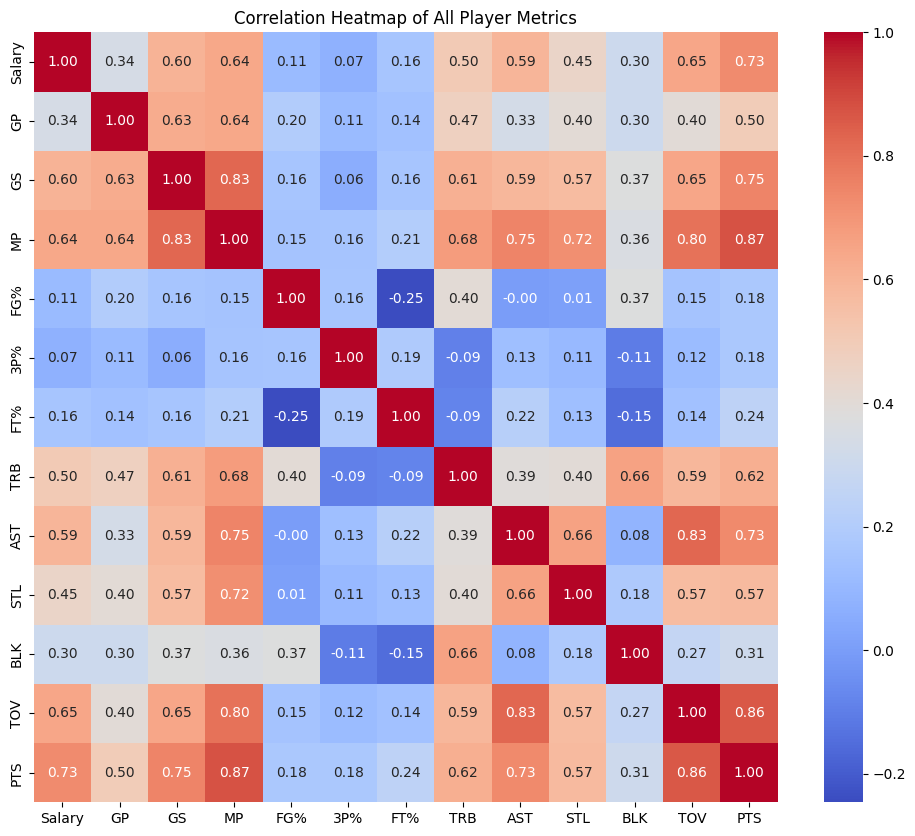

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of All Player Metrics')
plt.show()

As we can see, this heatmap generates a LOT of data that describes the relationship of each variable against one another. The diagonals have a direct correlation of 1 due to the fact that it is the relationship between an attribute and itself. However, since we are looking at dependent variable Salary, we can extract either the Salary row (or column, as they are identical) to see the relationship between Salary and another key variable:

In [11]:
correlation_df = pd.DataFrame(df.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])
correlation_df

,Salary
Salary,1.000000
GP,0.341707
GS,0.602267
MP,0.642099
FG%,0.111029
3P%,0.071895
FT%,0.161174
TRB,0.503633
AST,0.593971
STL,0.449517


As we see, most of our metrics have a positive correlation coefficient of varying strengths, which should be trivially known as the more you contribute towards your team, the higher you might be paid. However, we can see that some attributes, such as PTS (points per game), TOV (turnovers per game), and MP (minutes played) contribute more than some other statistics.

## Analysis of Players in Each Position in the NBA

Next, we want to partition our data into the five traditional positions for NBA players:
- PG (Point Guard)
- SG (Shooting Guard)
- SF (Small Forward)
- PF (Power Forward)
- C (Center)

Each of these positions play different roles on the floor, contribute differently to the team, and focus on different statistics. Since the main premise of our investigation is to break down which statistic affects a given position, it also makes sense that we split up our data.

In [12]:
# Splits DataFrame into five DataFrames based on the five traditional positions in basketball
dfPG = df.loc[df['Position'] == 'PG']
dfSG = df.loc[df['Position'] == 'SG']
dfSF = df.loc[df['Position'] == 'SF']
dfPF = df.loc[df['Position'] == 'PF']
dfC = df.loc[df['Position'] == 'C']

# We now want to check if there are any players that we missed from the main DataFrame that need to be assigned
print('Unassigned Players')
assigned_positions = ['PG','SG','SF','PF','C']
unassigned_df =  df[df['Position'].isin(assigned_positions)==False]
unassigned_df

Unassigned Players


,Player Name,Position,Salary,GP,GS,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PTS
11,Kyrie Irving,PG-SG,0.809568,0.719512,0.722892,0.908163,0.494,0.379,0.905,0.408,0.514019,0.366667,0.32,0.512195,0.818731
59,Mikal Bridges,SF-SG,0.418069,1.000000,1.000000,0.864796,0.468,0.382,0.895,0.352,0.308411,0.366667,0.28,0.365854,0.607251
63,Spencer Dinwiddie,SG-PG,0.405586,0.951220,0.951807,0.834184,0.438,0.369,0.812,0.272,0.607477,0.266667,0.12,0.439024,0.522659
91,Patrick Beverley,SG-PG,0.287028,0.804878,0.807229,0.645408,0.400,0.335,0.723,0.296,0.271028,0.300000,0.24,0.219512,0.187311
209,Matisse Thybulle,SF-SG,0.090997,0.853659,0.337349,0.385204,0.435,0.365,0.679,0.160,0.065421,0.400000,0.20,0.073171,0.123867
223,George Hill,PG-SG,0.083100,0.548780,0.012048,0.415816,0.470,0.358,0.764,0.144,0.224299,0.200000,0.04,0.170732,0.151057
251,Kevin Knox,SF-PF,0.062295,0.756098,0.060241,0.339286,0.458,0.349,0.767,0.224,0.046729,0.133333,0.08,0.195122,0.199396


Even though we split the DataFrame, we still have these players to take into consideration. From our own perspective, we will assign each of these players to both of the position DataFrames that they play to ensure that we get the best use of their statistics as possible.

In [13]:
# Add all dual position players to both of their respective categories
dfPG = pd.concat([dfPG] + [df.loc[df['Player Name'] == name] for name in ['Kyrie Irving','Spencer Dinwiddie','Patrick Beverley','George Hill']])
dfSG = pd.concat([dfSG] + [df.loc[df['Player Name'] == name] for name in ['Kyrie Irving','Spencer Dinwiddie','Patrick Beverley','George Hill',
                                                                          'Mikal Bridges','Matisse Thybulle']])
dfSF = pd.concat([dfSF] + [df.loc[df['Player Name'] == name] for name in ['Mikal Bridges','Matisse Thybulle','Kevin Knox']])
dfPF = pd.concat([dfSF, df[df['Player Name'] == 'Kevin Knox']])

With our DataFrame split out of the way, we can visualize player statistics via heatmaps in a similar way, but now with one heatmap per position instead of a single heatmap for the entire dataset.

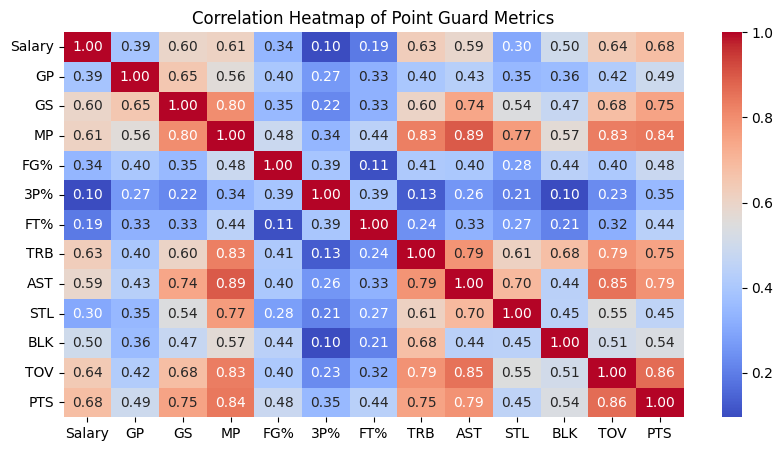

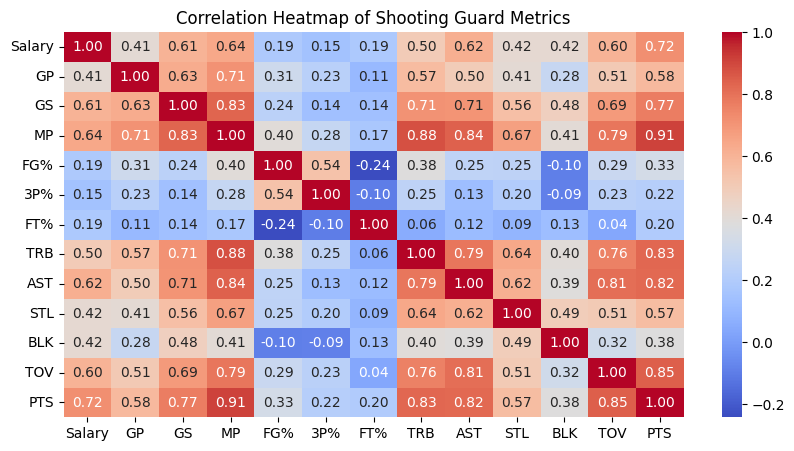

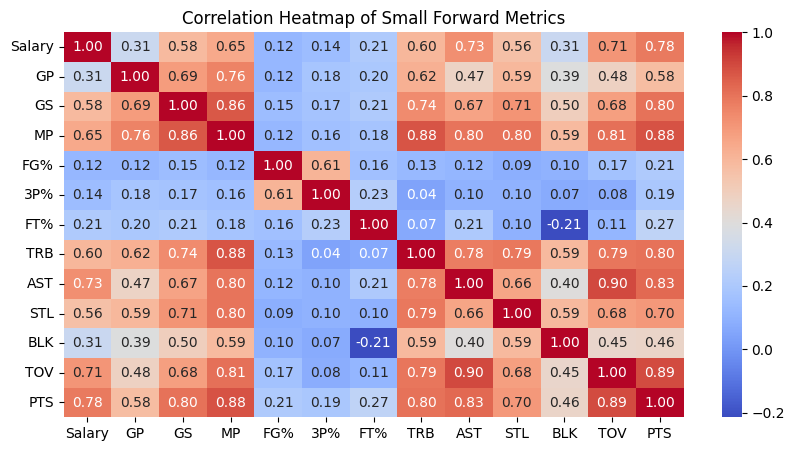

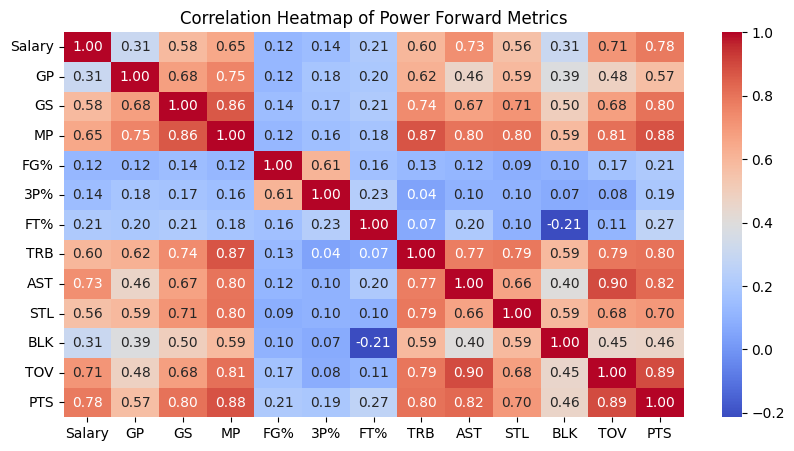

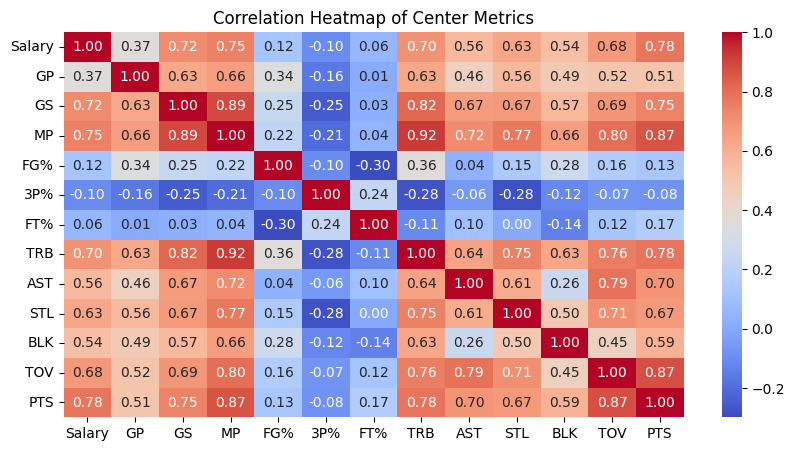

In [14]:
# Point Guard heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dfPG.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Point Guard Metrics')
plt.show()

# Shooting Guard heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dfSG.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Shooting Guard Metrics')
plt.show()

# Small Forward heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dfSF.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Small Forward Metrics')
plt.show()

# Power Forward heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dfPF.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Power Forward Metrics')
plt.show()

# Center heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dfC.drop(['Player Name', 'Position'], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Center Metrics')
plt.show()

Again, we want to extract and look solely at the row pertaining to the relationship between some statistic and the salary:

In [15]:
pg_correlations = pd.DataFrame(dfPG.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])
sg_correlations = pd.DataFrame(dfSG.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])
sf_correlations = pd.DataFrame(dfSF.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])
pf_correlations = pd.DataFrame(dfPF.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])
c_correlations = pd.DataFrame(dfC.drop(['Player Name', 'Position'], axis=1).corr()['Salary'])

print('Point Guard Correlations\n', pg_correlations, '\n', sep='')
print('Shooting Guard Correlations\n', sg_correlations, '\n', sep='')
print('Small Forward Correlations\n', sf_correlations, '\n', sep='')
print('Power Forward Correlations\n', pf_correlations, '\n', sep='')
print('Center Correlations\n', c_correlations, sep='')

Point Guard Correlations
          Salary
Salary  1.000000
GP      0.385500
GS      0.595365
MP      0.611452
FG%     0.342356
3P%     0.095853
FT%     0.193427
TRB     0.626349
AST     0.588165
STL     0.302558
BLK     0.499492
TOV     0.641990
PTS     0.679273

Shooting Guard Correlations
          Salary
Salary  1.000000
GP      0.411478
GS      0.606970
MP      0.643884
FG%     0.189797
3P%     0.147102
FT%     0.185196
TRB     0.502976
AST     0.617033
STL     0.418576
BLK     0.419351
TOV     0.602668
PTS     0.722848

Small Forward Correlations
          Salary
Salary  1.000000
GP      0.308720
GS      0.582603
MP      0.648533
FG%     0.120193
3P%     0.144509
FT%     0.208118
TRB     0.599394
AST     0.727836
STL     0.561908
BLK     0.306256
TOV     0.707233
PTS     0.782102

Power Forward Correlations
          Salary
Salary  1.000000
GP      0.305166
GS      0.583891
MP      0.649364
FG%     0.119153
3P%     0.143852
FT%     0.207704
TRB     0.599483
AST     0.728432
STL   

These are helpful in showing which statistics have the strongest correlation with salary, and which statistics do not have much correlation with it.

# Results

## Overall Results

For the purpose of our project, we are going to look at only the attributes that have an correlation coefficient magnitude of 0.5 and up (meaning both 0.5 and -0.5 count). This is because if we do not see that a particular statistic highlights a trend in a player's salary, we do not want to look at it so as to avoid multiple features leading to a lack of clarity in our model.

For this next part, we are going to use the Multilinear Regression taught to us in order to plot the relationship of the select group of statistics with a player's salary, starting with one that uses all players as we analyzed before, and then by a player's position.

In [16]:
# Gets all the attributes with a correlation coefficient above 0.5 with Salary for all positions (besides the Salary attribute itself)
independent = list(correlation_df[(correlation_df['Salary'] >= 0.5) & (correlation_df['Salary'] != 1)].index)
dependent = ['Salary']

X = df[independent]
X = sm.add_constant(X)

y = df[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     96.60
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.03e-78
Time:                        05:30:08   Log-Likelihood:                 229.46
No. Observations:                 467   AIC:                            -444.9
Df Residuals:                     460   BIC:                            -415.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0129      0.018     -0.703      0.4

According to the model above, the variable that affects a player's salary the most, without separating based on position, is a player's points-per-game. Who would've thought! Note that this is also taking into account the p-value (which we are looking for to be under 0.05 for this investigation), which highlights the probability that a result is based on random chance (with values closer to 1 being a greater likelihood that it is more random).

## Results by Position

We will now mimic this structure across all five position DataFrames to see what statistic influences each position's salary the most!

In [17]:
# Find features with correlation coefficients above the threshold, set as X, set y as Salary, and fit a model to the data!
pg_independent = list(pg_correlations[(pg_correlations['Salary'] >= 0.5) & (pg_correlations['Salary'] != 1)].index)
X = dfPG[pg_independent]
X = sm.add_constant(X)
y = dfPG[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary for point guards is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     13.24
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           4.01e-10
Time:                        05:31:31   Log-Likelihood:                 15.418
No. Observations:                  81   AIC:                            -16.84
Df Residuals:                      74   BIC:                          -0.07429
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0157      0.062     -0.255      0.7

Our data shows that for point guards,  the variable that affects a player's salary the most is a player's rebounds-per-game. This is pretty surprising, as we would expect a point guard's passing abilities to be valued more than their rebounding ability, as they are comprised of relatively shorter players in the league. Coming in second, we see that a point guard's points-per-game is the second-most important statistic that affects their salary as well.

In [18]:
# Same code structure as PG, but for SGs now!
sg_independent = list(sg_correlations[(sg_correlations['Salary'] >= 0.5) & (sg_correlations['Salary'] != 1)].index)
X = dfSG[independent]
X = sm.add_constant(X)
y = dfSG[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary for shooting guards is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     25.42
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           5.43e-19
Time:                        05:32:12   Log-Likelihood:                 85.671
No. Observations:                 121   AIC:                            -157.3
Df Residuals:                     114   BIC:                            -137.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0297      0.031      0.952      0.3

For shooting guards, the variable that affects a player's salary the most is the points-per-game, which is not what we expected in our hypothesis, but fits the role of a shooting guard being the primary scorer!

In [19]:
# Same code structure as PG, but for SFs now!
sf_independent = list(sf_correlations[(sf_correlations['Salary'] >= 0.5) & (sf_correlations['Salary'] != 1)].index)
X = dfSF[independent]
X = sm.add_constant(X)
y = dfSF[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary for small forwards is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     28.18
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.82e-18
Time:                        05:35:03   Log-Likelihood:                 56.765
No. Observations:                  94   AIC:                            -99.53
Df Residuals:                      87   BIC:                            -81.73
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0311      0.036     -0.868      0.3

For small forwards, the variable that affects a player's salary the most is the points-per-game a small forward puts up. Not too far behind are assists-per-game, which might be valued high as small forwards are versatile players who can have a strong presence in both scoring points and facilitating the offense. This proved our hypothesis!

In [20]:
# Same code structure as PG, but for PFs now!
pf_independent = list(pf_correlations[(pf_correlations['Salary'] >= 0.5) & (pf_correlations['Salary'] != 1)].index)
X = dfPF[independent]
X = sm.add_constant(X)
y = dfPF[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary for power forwards is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     28.60
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           9.82e-19
Time:                        05:36:05   Log-Likelihood:                 57.871
No. Observations:                  95   AIC:                            -101.7
Df Residuals:                      88   BIC:                            -83.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0310      0.036     -0.872      0.3

Similar to small forwards, value for power forwards seems to be seen in their points-per-game and their assists-per-game, another surprising finding.

In [21]:
# Same code structure as PG, but for Cs now!
c_independent = list(c_correlations[(c_correlations['Salary'] >= 0.5) & (c_correlations['Salary'] != 1)].index)
X = dfC[independent]
X = sm.add_constant(X)
y = dfC[dependent]

model = sm.OLS(y, X).fit()

print(model.summary())

# Find the variable with the largest beta value
print("\nThe variable with the greatest impact on salary for centers is: ", model.params.idxmax())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     26.51
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.74e-17
Time:                        05:36:28   Log-Likelihood:                 72.339
No. Observations:                  91   AIC:                            -130.7
Df Residuals:                      84   BIC:                            -113.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0310      0.036     -0.851      0.3

For centers, the variable that affects a player's salary the most is also their points-per-game.

# Ethics & Privacy

* In our research of NBA players' salaries and the contributing factors that affect them, we have several ethical considerations, including biases, privacy, and terms of use . Our datasets may carry biases, such as the representation and data collection methods. For example, they might disproportionately represent star players or those have larger markets, skewing  the analysis towards higher salaries and therefore overlooking players having smaller markets.  Furthermore, the method of data collection and historical context might embed systemic biases into the datasets, such as disparities in pay due to factors unrelated to performance. 
* To address these challenges, we plan to employ a comprehensive approach to identify potential biases in our datasets. This includes statistical analysis to uncover overrepresentation or underrepresentation of certain groups, cross-referencing data from multiple sources to validate findings, and conducting sensitivity analyses to understand the impact of potential biases on our conclusions. Throughout the research process, we will be careful for biases, continuously assessing our data and methods for any signs of inequity. We will carefully review the terms of use of each dataset to ensure compliance with its guidelines. Our analysis will focus on aggregated data to minimize privacy risks, and any sensitive or potentially identifiable information will be treated with extreme care. We also consider the ethical implications of our findings and how they are communicated to ensure that we do not inadvertently compromise player privacy or misrepresent data.
* To ensure a fair analysis, we will strive to include a large variety of players in our research, taking into account variables such as position, tenure, and market size. This inclusivity helps reduce the risk of drawing conclusions that only reflect the experiences of the most visible or highest-paid players. By addressing these ethical issues, we aim to ensure that our research is responsible and produces insights that are not only valuable to understanding the NBA's salary dynamics, but also respect the privacy of the players represented in our dataset.

# Discussion and Conclusion

In our analysis of NBA player statistics in relation to their salaries, we hypothesized that there would be certain statistics that would act as major contributing factors in a player's salary. We beleived that these contributing factors would be different, and depend on a player's position. For point guards, we thought assists per game would be the biggest factor. For shooting guards, 3 point efficiency (volume and percentage). For small forwards, points per game. For power forwards, field goal percentage. And lastly for centers, blocks per game and rebounds per game. Basketball can be formulaic as much as it can be a sport, and a team's success relies on it's players filling their roles, so our thought process behind this hypothesis was that by identifying the most important metrics for a player by position, it would help explain the salary that they would be rewarded.

Historically, point guards have been viewed as the engine that runs the team, oftentimes being the main facilitator of the ball and racking up assists, so assists per game seemed like the most important metric to measure their success in that role. They are often the smallest player on the team. Similarly, their guard duo in the Shooting Guard, often known as the 2 or the off guard, is typically a smaller player, but rather than focus on ball handling and passing, they play "off" the ball and are relied on for their shooting capabilities, which led us to select 3 point efficiency as their metric. Small forwards are often interchangable with shooting guards, but are often bigger and stronger, so they are very much the jack of all trades on the court. They can handle the ball, generate offense, defend bigger players, and use their size as an advantage to score the ball, which is why we chose points per game as their metric. Power forwards and centers are typically the biggest players on the team, and do a lot of their dirty work in the post and the low block, focusing on shots closer to the basket such as lay ups and dunks, so we believed that the most important metric for a power forward would be how efficient they are in that area of the game, so we chose to focus on their field goal percentage. And finally, the biggest player on the court- the Center, is the big man. They are responsible for all of the things a power forward are responsible for, but given their massive size, they are typically the defensive anchor on the team, and rack up rebounds and blocks, which is the metric we chose for them.

Our findings both supported some of our hypothesized thoughts, but also left us surprised in certain areas. For point guards, we were very surprised to find that the statistic that had the greatest influence on their salary is their rebounds per game, which was very surprising given their typical size. For shooting guards, we were unsurprised to find that their most valuable statistic was their points per game. While it was not exactly what we had hypothesized, it makes sense given they are often the team's leading scorer. For power forwards, our exploratory data analysis supported our hypothesis and we found that their scoring was their most important statistic. For the four, or power forwards, we found that their most important statistics were points per game, but also their assists per game, which was a little surprising. And finally for the center, we found that the statistic that had the greatest impact on their salary was also their points per game.

Conventional basketball knowledge helps to define a player's role in the game. But the game is played differently now than it was when it was first created 75 years ago, 50 years ago, and even in the last 10 years. The way the game is played has changed, and so it makes sense that the way each position functions is also different. The modern era of basketball puts a much greater emphasis on offense, so it makes sense that a lot of the metrics that were found to have the greatest impact related to scoring the ball. While each position will always have their "main responsibilities," at the end of the day, the winner of the game is who scores the most points, and on a similar note, the players who are able to help contribute to that are winner's in their own right, as their bank accounts will be rewarded.



# Team Contributions

- Ryan Ding: Performed data preprocessing, refined exploratory data analysis, added markdown cells to explain code
- Alfernie Fabricante: Formulated research question, Found databases, Helped identify points/data of interest, helped with discussion and conclusion
- Grace Pei: 
- Brendan Kuang: 
- Clarence Chow: 